In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IBM-HR_analytics-Employee-Attrition.csv')
print('Shape of Dataset-',df.shape)
df.head()

Shape of Dataset- (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Analyzing Features


In [5]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We can notice that Features **EmployeeCount**, **Over18** and **StandardHours** has only one unique value and the feature **EmployeeNumber** has 1470 unique values. These Features will not be helpful for us so we will remove it from our dataset. 


In [6]:
df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'] , axis = 1 , inplace=True)
df.shape

(1470, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### 1. Categorical Features

In [8]:
object_col = []
for column in df.columns:
    if column!= 'Attrition' and df[column].dtype == object:
        object_col.append(column)
        print(f"{column} : {df[column].unique()} = {df[column].nunique()}")
        print(df[column].value_counts())
        print("====================================\n")


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] = 3
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources'] = 3
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] = 6
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender : ['Female' 'Male'] = 2
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] = 9
JobRole
Sales Execu

In [9]:
print(object_col)
print(f'\nLength: {len(object_col)}')

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Length: 7


### 2. Numerical Columns

In [10]:
numerical_col = []
for column in df.columns:
    if df[column].dtype == int and len(df[column].unique()) <= 30:
        numerical_col.append(column)
        print(f'{column} : {df[column].unique()}')
        print('=================================================================\n')

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]

Education : [2 1 4 3 5]

EnvironmentSatisfaction : [2 3 4 1]

JobInvolvement : [3 2 4 1]

JobLevel : [2 1 3 4 5]

JobSatisfaction : [4 2 3 1]

NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]

PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]

PerformanceRating : [3 4]

RelationshipSatisfaction : [1 4 2 3]

StockOptionLevel : [0 1 3 2]

TrainingTimesLastYear : [0 3 2 5 1 4 6]

WorkLifeBalance : [1 3 2 4]

YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]

YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]

YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]



##### Displaying only Minimum and Maximum Values of Features having nunique() count greater than 30

In [11]:

for column in df.columns:
    if df[column].dtype == int and df[column].nunique() >=30:
        numerical_col.append(column)        
        print(f'{column} : MINIMUM = {df[column].min()} & MAXIMUM = {df[column].max()}\n')
    
    

Age : MINIMUM = 18 & MAXIMUM = 60

DailyRate : MINIMUM = 102 & MAXIMUM = 1499

HourlyRate : MINIMUM = 30 & MAXIMUM = 100

MonthlyIncome : MINIMUM = 1009 & MAXIMUM = 19999

MonthlyRate : MINIMUM = 2094 & MAXIMUM = 26999

TotalWorkingYears : MINIMUM = 0 & MAXIMUM = 40

YearsAtCompany : MINIMUM = 0 & MAXIMUM = 40



In [12]:
print(numerical_col)
print(f'\nLength: {len(numerical_col)}')

['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']

Length: 23


### 3. Label Feature 

In [13]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

# **EDA - USING VISUALIZATIONS**

## 1. Analysis of Features using Barplots and Histograms 

### A) Categorical Features

In [14]:
print(object_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


#### BusinessTravel

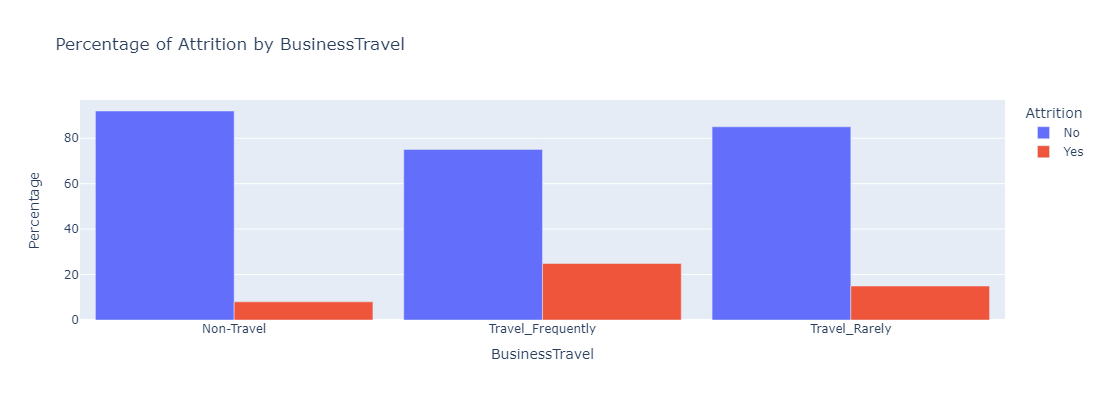

In [15]:
df_perc = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='BusinessTravel', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by BusinessTravel',
             labels={'percentage': 'Percentage', 'BusinessTravel': 'BusinessTravel', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The Employees who travel Frequently are more likely to leave the job 

#### Department

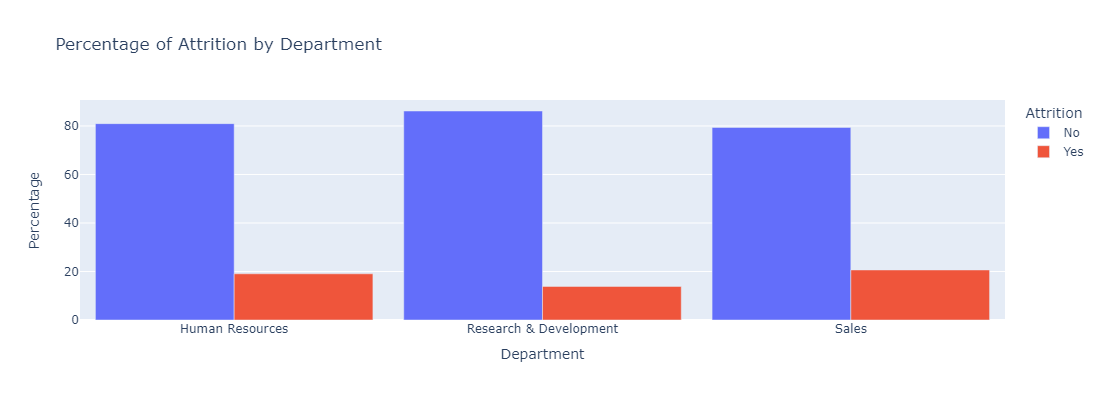

In [16]:
df_perc = df.groupby('Department')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='Department', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by Department',
             labels={'percentage': 'Percentage', 'Department': 'Department', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The Employees working in **Sales** and **Human Resources** Departments are more likely leaving the jobs

#### EducationField

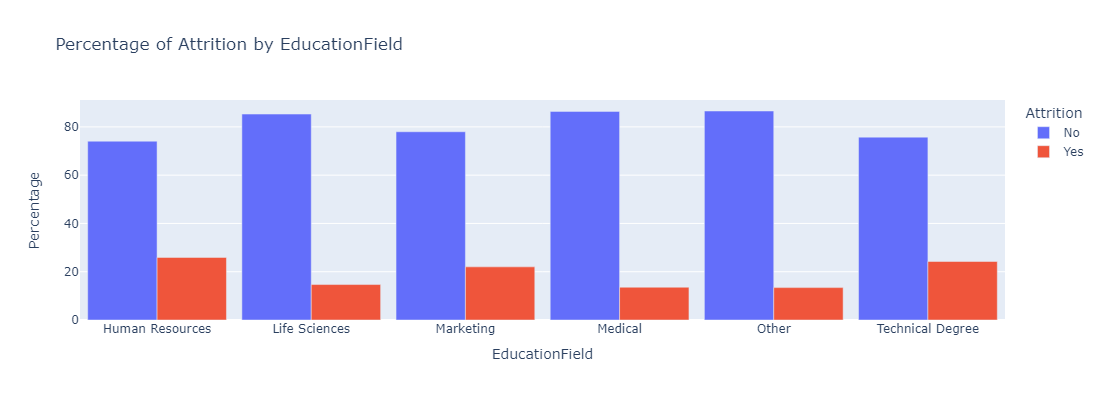

In [17]:
df_perc = df.groupby('EducationField')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='EducationField', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by EducationField',
             labels={'percentage': 'Percentage', 'EducationField': 'EducationField', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The Employees with **Human Resources** and **Technical Degree** are more likely to leave the job

#### Gender

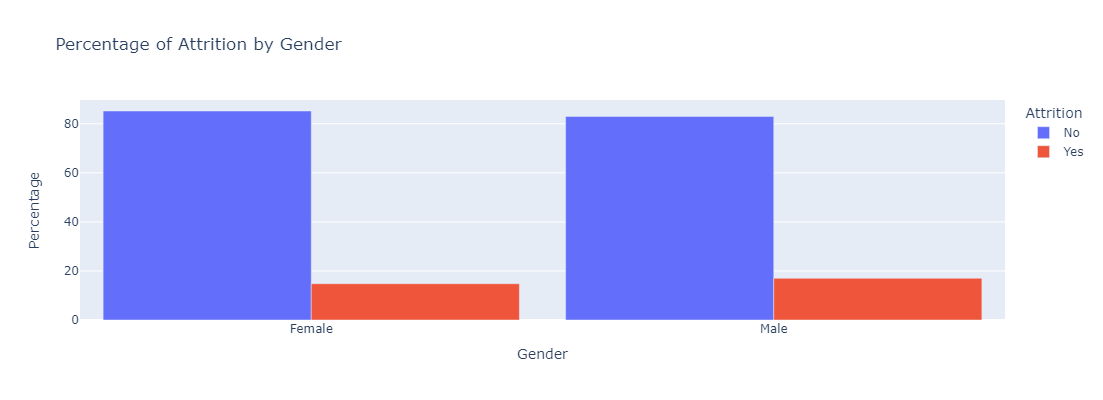

In [18]:
df_perc = df.groupby('Gender')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='Gender', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by Gender',
             labels={'percentage': 'Percentage', 'Gender': 'Gender', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The **Male** Employees are more likely to leave the job

#### JobRole

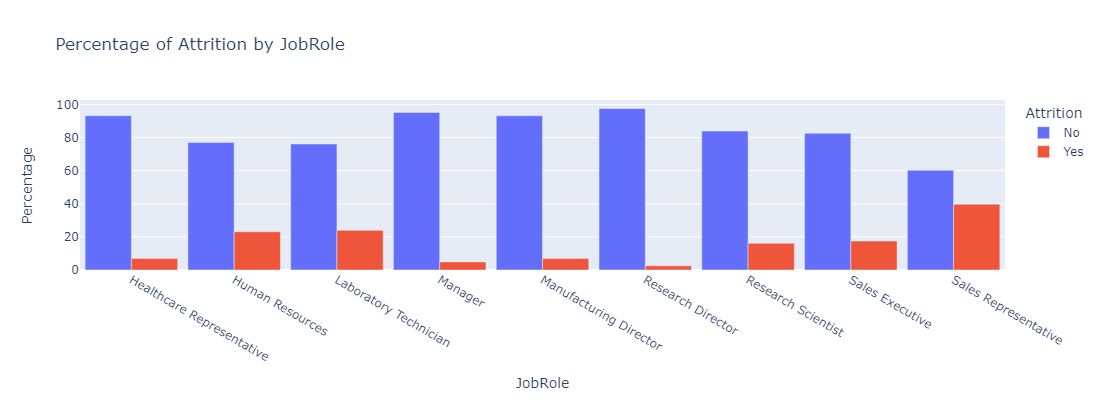

In [19]:
df_perc = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='JobRole', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by JobRole',
             labels={'percentage': 'Percentage', 'JobRole': 'JobRole', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=800, height=400, bargap=0.1)
fig.show()

##### The Employees with job roles of **Sales Representative**, **Laboratory Technician** and **Human Resources** are more likely to leave the job

#### MaritalStatus

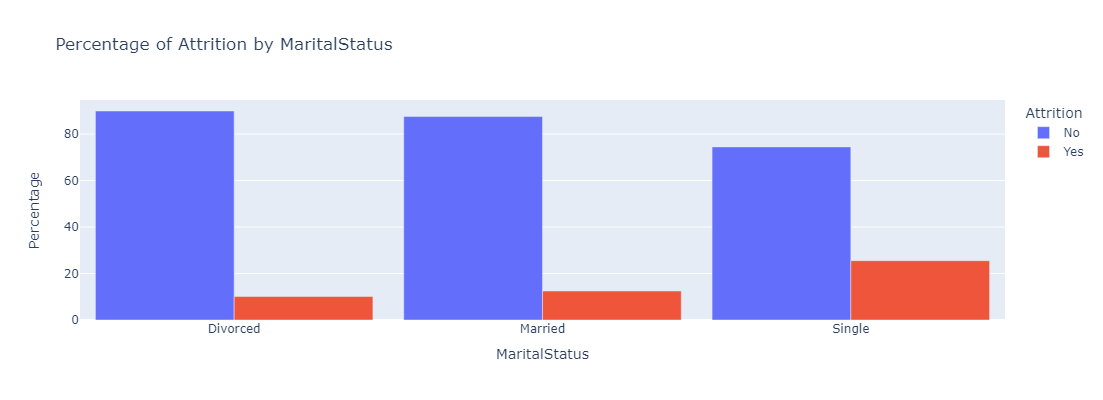

In [20]:
df_perc = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='MaritalStatus', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by MaritalStatus',
             labels={'percentage': 'Percentage', 'MaritalStatus': 'MaritalStatus', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The Employees that are **Single**, are more likely to leave the job

#### OverTime

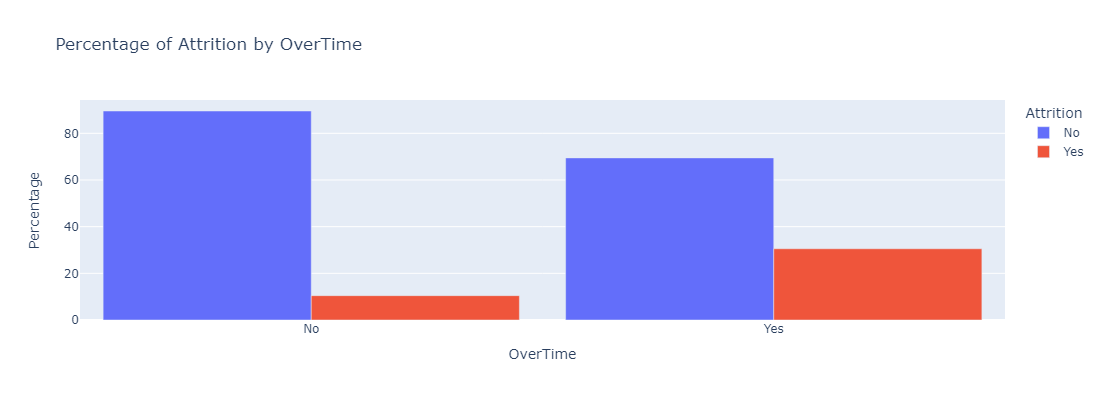

In [21]:
df_perc = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='OverTime', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by OverTime',
             labels={'percentage': 'Percentage', 'OverTime': 'OverTime', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=400, height=400, bargap=0.1)
fig.show()

##### The Employees Working Overtime are more likely to leave the job

### B) Numerical Features - Top 10 Most Correlated with Attrition


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

numerical_columns = df.select_dtypes(include=['number']).columns
correlations = df[numerical_columns].corrwith(df['Attrition']).abs().sort_values(ascending=False)
top_10_correlations = correlations.head(11)[1:] 

top_10_correlations

TotalWorkingYears       0.171063
JobLevel                0.169105
YearsInCurrentRole      0.160545
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
StockOptionLevel        0.137145
YearsAtCompany          0.134392
JobInvolvement          0.130016
JobSatisfaction         0.103481
dtype: float64

#### TotalWorkingYears

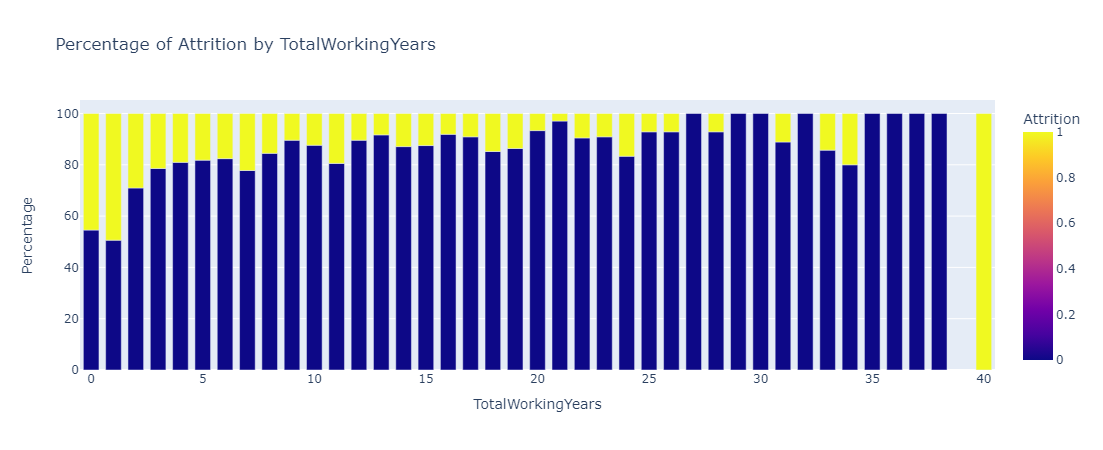

In [23]:
df_perc = df.groupby('TotalWorkingYears')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
fig = px.bar(df_perc, x='TotalWorkingYears', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by TotalWorkingYears',orientation='v',
             labels={'percentage': 'Percentage', 'TotalWorkingYears': 'TotalWorkingYears', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=450, bargap=0.3)
fig.show()

##### The Employees that have less working years are more likely to leave the job

#### JobLevel

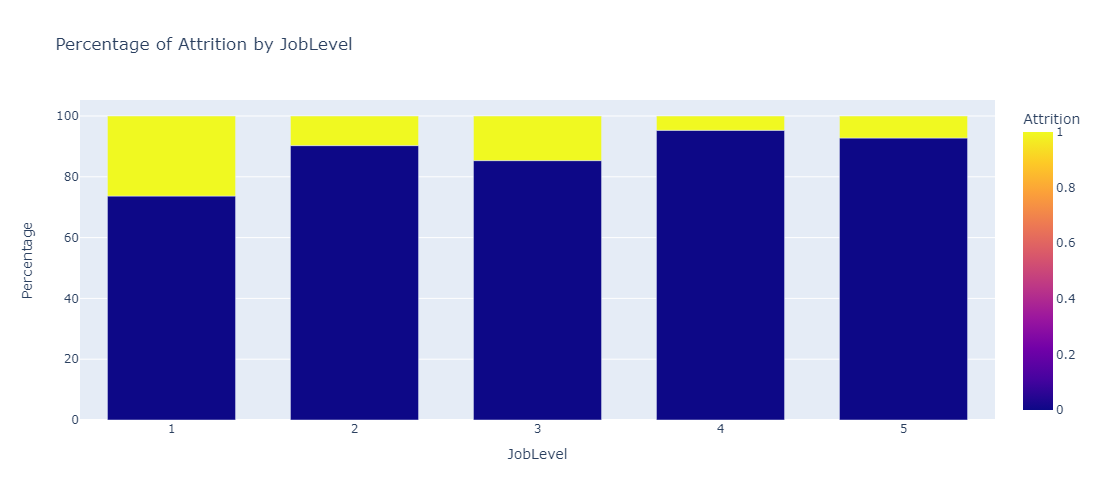

In [24]:
df_perc = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='JobLevel', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by JobLevel',orientation='v',
             labels={'percentage': 'Percentage', 'JobLevel': 'JobLevel', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees that come under **Job Level 1** are more likely to leave the job

#### YearsInCurrentRole

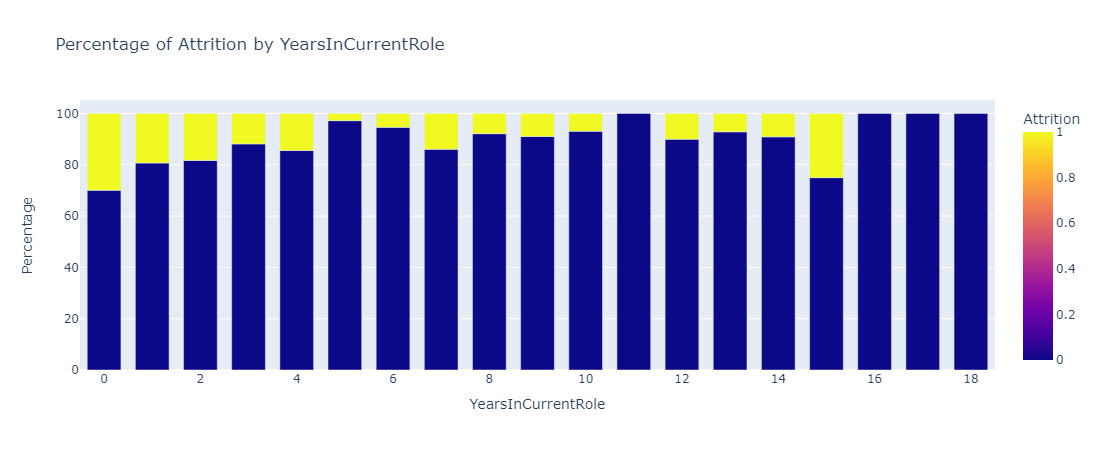

In [25]:
df_perc = df.groupby('YearsInCurrentRole')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='YearsInCurrentRole', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by YearsInCurrentRole',orientation='v',
             labels={'percentage': 'Percentage', 'YearsInCurrentRole': 'YearsInCurrentRole', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=450, bargap=0.3)
fig.show()

##### The Employees that are **Freshers** i.e having 0 years of experience or the employees that have higher experiences like **15 years** in current role are more likely to leave the job.

#### MonthlyIncome

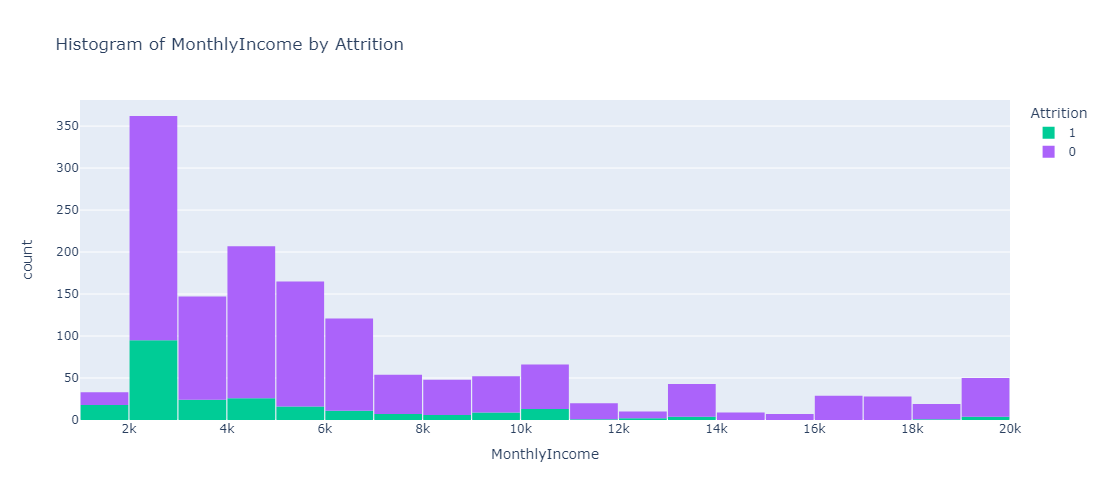

In [26]:
fig = px.histogram(df, x='MonthlyIncome', color='Attrition', nbins=20,
                   title='Histogram of MonthlyIncome by Attrition',
                   labels={'MonthlyIncome': 'MonthlyIncome', 'count': 'Count', 'color': 'Attrition'},
                   color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'})
fig.update_layout(width=1000, height=500,bargap=0.025)
fig.show()

##### The Employees that get Less salaries i.e in range **0k - 11k** are more likely to leave the job

#### Age

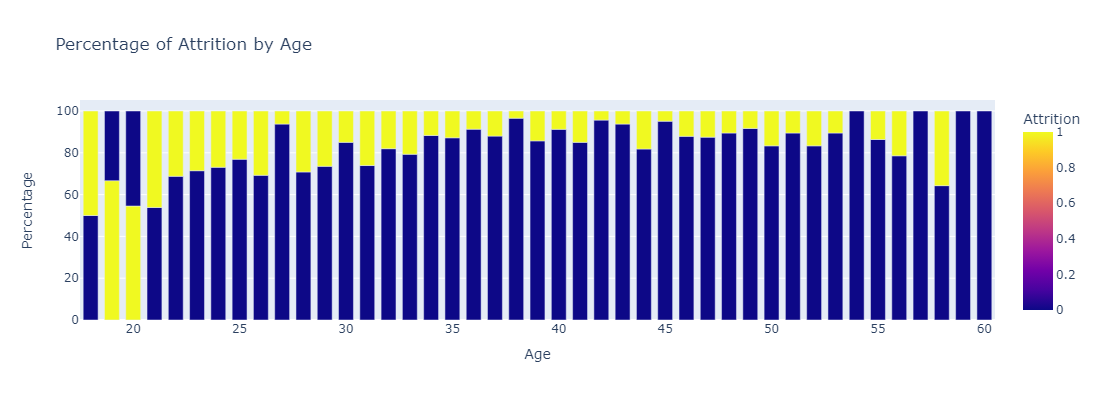

In [27]:
df_perc = df.groupby('Age')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='Age', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by Age',orientation='v',
             labels={'percentage': 'Percentage', 'Age': 'Age', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=400, bargap=0.3)
fig.show()

##### The Employees with minimum age groups are more likely to leave the job 

#### YearsWithCurrManager

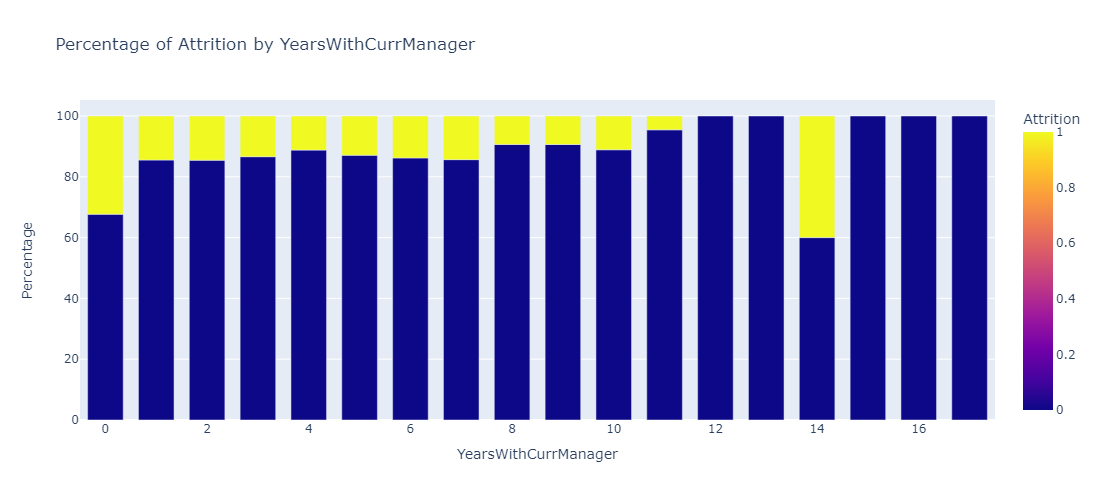

In [28]:
df_perc = df.groupby('YearsWithCurrManager')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='YearsWithCurrManager', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by YearsWithCurrManager',orientation='v',
             labels={'percentage': 'Percentage', 'YearsWithCurrManager': 'YearsWithCurrManager', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees that worked with their current manager for **14 years** and **0 years** are more likely to leave the job

#### StockOptionLevel

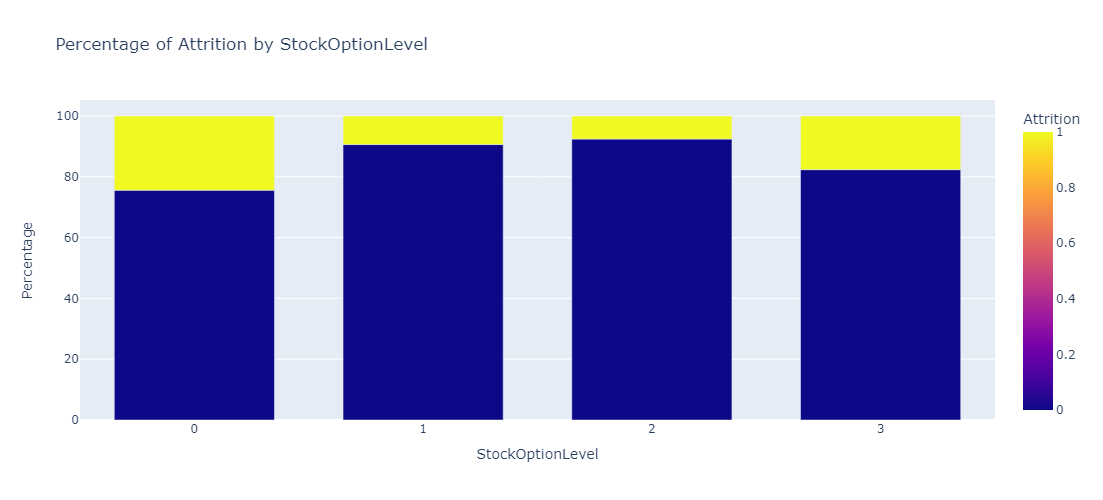

In [29]:
df_perc = df.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='StockOptionLevel', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by StockOptionLevel',orientation='v',
             labels={'percentage': 'Percentage', 'StockOptionLevel': 'StockOptionLevel', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees that have **Stock-Option Level 1**  are more likely to leave the job

#### YearsAtCompany

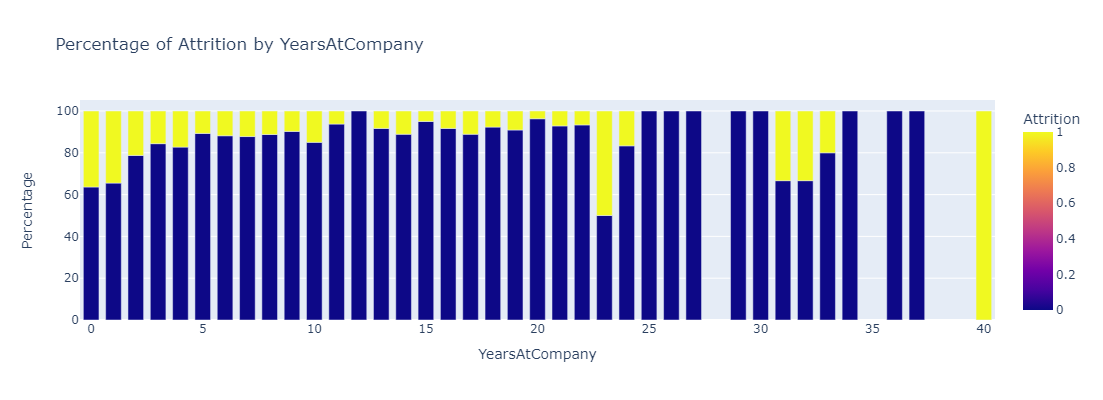

In [30]:
df_perc = df.groupby('YearsAtCompany')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='YearsAtCompany', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by YearsAtCompany',orientation='v',
             labels={'percentage': 'Percentage', 'YearsAtCompany': 'YearsAtCompany', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=400, bargap=0.3)
fig.show()

##### The Employees with 50, 0 and 1 years of experience in the company are more likely to leave the job.

#### JobInvolvement

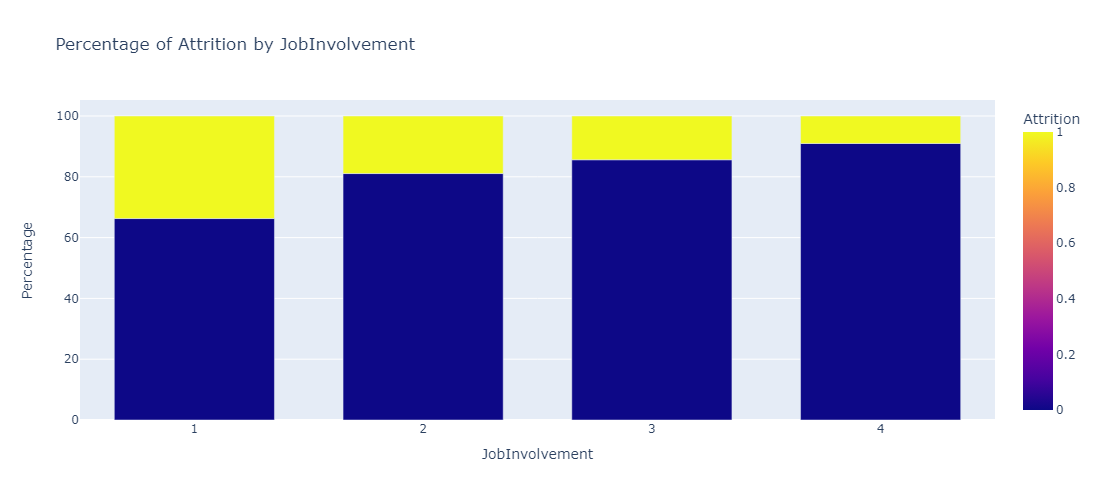

In [31]:
df_perc = df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='JobInvolvement', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by JobInvolvement',orientation='v',
             labels={'percentage': 'Percentage', 'JobInvolvement': 'JobInvolvement', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees Having minimum Job Involvement are more likely to leave the jobs.

#### JobSatisfaction

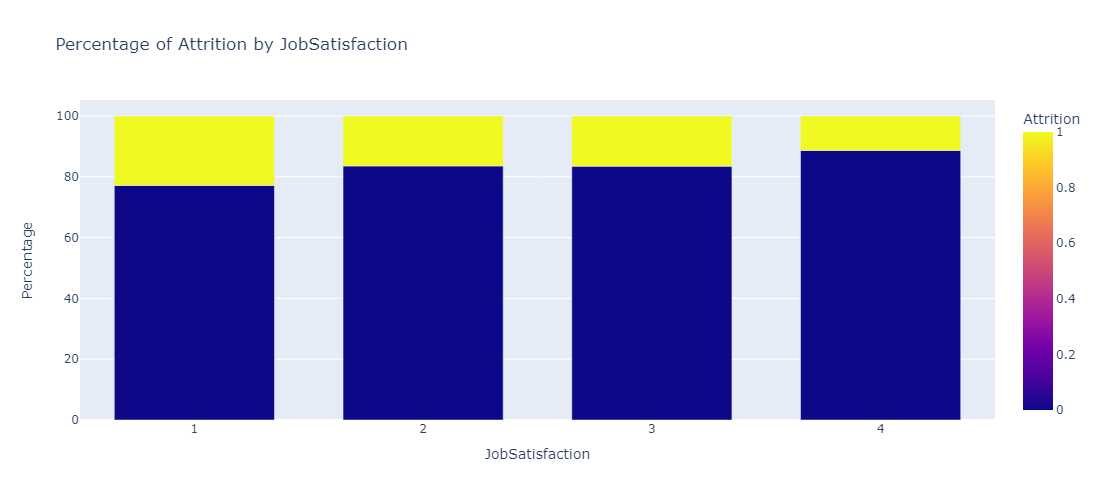

In [32]:
df_perc = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='JobSatisfaction', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by JobSatisfaction',orientation='v',
             labels={'percentage': 'Percentage', 'JobSatisfaction': 'JobSatisfaction', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees Having minimum Job Satisfaction are more likely to leave the jobs.

#### DistanceFromHome 

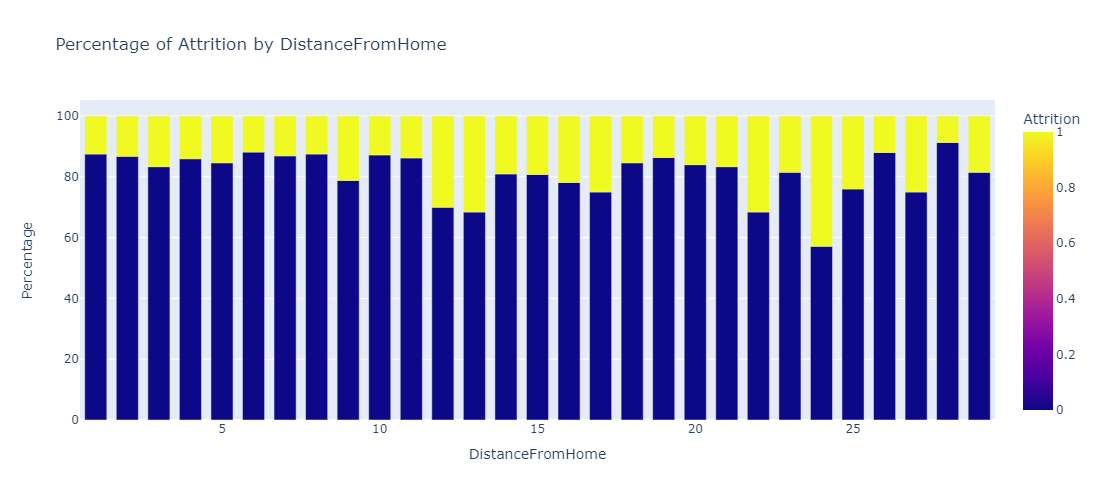

In [33]:
df_perc = df.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

fig = px.bar(df_perc, x='DistanceFromHome', y='percentage', color='Attrition', barmode='group',
             title='Percentage of Attrition by DistanceFromHome',orientation='v',
             labels={'percentage': 'Percentage', 'DistanceFromHome': 'DistanceFromHome', 'Attrition': 'Attrition'},
             color_discrete_map={'Yes': '#EF553B', 'No': '##AB63FA'})
fig.update_layout(width=800, height=500, bargap=0.3)
fig.show()

##### The Employees travelling through distance higher distances, example 22-24 distance units are more likely to leave the job

## 2. Heatmap

In [34]:
corr_df = df.copy()
for column in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    corr_df[column] = le.fit_transform(corr_df[column])

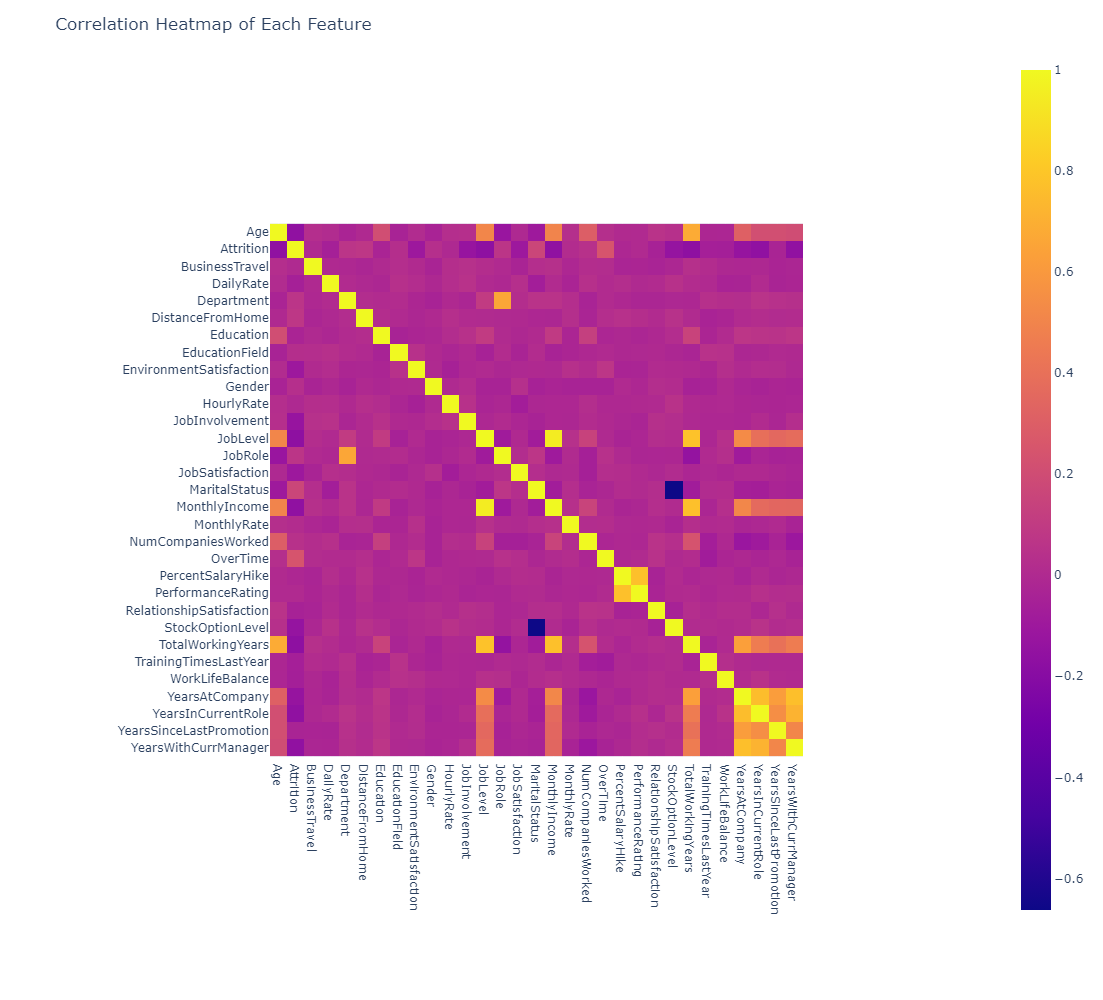

In [35]:
import plotly.express as px

fig = px.imshow(corr_df.corr())
fig.update_layout(title='Correlation Heatmap of Each Feature')
fig.update_layout(height=1000, width=800) 

fig.show()

### Insights:- 
- Monthly Income is highly Correlated with the level of the job as well as Total Working Years
- Percent Salary Hike is highly Correlated with the Performance Rating
- Job level is highly correlated with Total Working Years
- Stock-Option Level is negatively correlated with Marital Status  

# **DATA PREPROCESSING**

In [36]:
df.duplicated().sum()

0

In [37]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

### Encoding Data 

In [38]:
# METHOD 1---->

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']:
    df[column] = le.fit_transform(df[column])


# METHOD 2---->

# dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
# df = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')

In [39]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [40]:
# THIS CODE SELECTS ONLY FEATURES THAT ARE CORRELATED TO ATTRITION WITH CORRELATION > 0.02 (ABSOLUTE VALUE)

# feature_correlation = df.corrwith(df.Attrition).sort_values(ascending=False)
# model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
# len(model_col)
# model_col
# df = df[model_col]

### Splitting and Normalizing the data

In [41]:
X = df.drop(columns=['Attrition'],axis=1)
y = df['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# **Model Building, Evaluation and Optimization** 

In [42]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)
    

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

initial_accuracies = {}
def evaluate(model_name,model, X_train, X_test, y_train, y_test):

    model.fit(X_train,y_train) 
    
    train_accuracy = model.score(X_train,y_train)*100
    print(f'TRAINING ACCURACY - {train_accuracy} %')
    y_train_pred =  model.predict(X_train)
    print(f'CONFUSION MATRIX -\n {confusion_matrix(y_train,y_train_pred)}')
    print(f'CLASSIFICATION REPORT - \n{classification_report(y_train,y_train_pred)}\n\n')
   
    y_test_pred= model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)*100
    print(f'TESTING ACCURACY - {test_accuracy} %')   
    print(f'CONFUSION MATRIX -\n {confusion_matrix(y_test,y_test_pred)}')
    print(f'CLASSIFICATION REPORT - \n{classification_report(y_test,y_test_pred)}\n')
    
    initial_accuracies[model_name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}


In [44]:
from sklearn.model_selection import GridSearchCV

optimized_accuracies = {}

def optimize(model_name,model, X_train, X_test, y_train, y_test):

    model.fit(X_train,y_train) 
    
    train_accuracy = model.score(X_train,y_train)*100
    print(f'TRAINING ACCURACY - {train_accuracy} %')
    y_train_pred =  model.predict(X_train)
    print(f'CONFUSION MATRIX -\n {confusion_matrix(y_train,y_train_pred)}')
    print(f'CLASSIFICATION REPORT - \n{classification_report(y_train,y_train_pred)}\n\n')
   
    y_test_pred= model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)*100
    print(f'TESTING ACCURACY - {test_accuracy} %')   
    print(f'CONFUSION MATRIX -\n {confusion_matrix(y_test,y_test_pred)}')
    print(f'CLASSIFICATION REPORT - \n{classification_report(y_test,y_test_pred)}\n')
   
    optimized_accuracies[model_name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

# 1. Logistic Regression

### Initial Training

In [45]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
evaluate('Logistic Regression',lr_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 87.41496598639455 %
CONFUSION MATRIX -
 [[960  26]
 [122  68]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       986
           1       0.72      0.36      0.48       190

    accuracy                           0.87      1176
   macro avg       0.81      0.67      0.70      1176
weighted avg       0.86      0.87      0.86      1176



TESTING ACCURACY - 86.39455782312925 %
CONFUSION MATRIX -
 [[236  11]
 [ 29  18]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.62      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294




### Using GridSerachCV for Optimization

In [46]:
lr_param_grid = dict(
    penalty= ['l1','l2','elasticnet',None], 
    solver =['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']    
)
lr_clf = LogisticRegression(random_state=42)
lr_search = GridSearchCV(lr_clf, param_grid=lr_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
lr_search.fit(X_train_std, y_train)

lr_clf = LogisticRegression(**lr_search.best_params_, random_state=42)
lr_clf.fit(X_train_std, y_train)
optimize('Logistic Regression', lr_clf, X_train_std, X_test_std, y_train, y_test)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
TRAINING ACCURACY - 87.41496598639455 %
CONFUSION MATRIX -
 [[960  26]
 [122  68]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       986
           1       0.72      0.36      0.48       190

    accuracy                           0.87      1176
   macro avg       0.81      0.67      0.70      1176
weighted avg       0.86      0.87      0.86      1176



TESTING ACCURACY - 86.39455782312925 %
CONFUSION MATRIX -
 [[236  11]
 [ 29  18]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.62      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294




In [47]:
print(initial_accuracies)
print(optimized_accuracies)

{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}}
{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}}


# 3. Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
evaluate('Decision Tree',dt_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 100.0 %
CONFUSION MATRIX -
 [[986   0]
 [  0 190]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



TESTING ACCURACY - 76.19047619047619 %
CONFUSION MATRIX -
 [[202  45]
 [ 25  22]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       247
           1       0.33      0.47      0.39        47

    accuracy                           0.76       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.80      0.76      0.78       294




In [49]:
dt_param_grid = dict(
    max_features= ['auto', 'sqrt'],
    criterion=['gini', 'entropy'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_search = GridSearchCV(dt_clf, param_grid=dt_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
dt_search.fit(X_train_std, y_train)

dt_clf = DecisionTreeClassifier(**dt_search.best_params_, random_state=42)
dt_clf.fit(X_train_std, y_train)
optimize('Decision Tree', dt_clf, X_train_std, X_test_std, y_train, y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
TRAINING ACCURACY - 85.03401360544217 %
CONFUSION MATRIX -
 [[979   7]
 [169  21]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       986
           1       0.75      0.11      0.19       190

    accuracy                           0.85      1176
   macro avg       0.80      0.55      0.56      1176
weighted avg       0.84      0.85      0.80      1176



TESTING ACCURACY - 85.71428571428571 %
CONFUSION MATRIX -
 [[244   3]
 [ 39   8]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.73      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.79      0.58      0.60       294
weighted avg       0.84      0.86      0.82       294




In [50]:
print(initial_accuracies)
print(optimized_accuracies)

{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 100.0, 'test_accuracy': 76.19047619047619}}
{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 85.03401360544217, 'test_accuracy': 85.71428571428571}}


# 3. Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
evaluate('Random Forest',rf_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 100.0 %
CONFUSION MATRIX -
 [[986   0]
 [  0 190]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



TESTING ACCURACY - 85.71428571428571 %
CONFUSION MATRIX -
 [[244   3]
 [ 39   8]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.73      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.79      0.58      0.60       294
weighted avg       0.84      0.86      0.82       294




In [52]:
rf_param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    criterion=['gini', 'entropy'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
rf_search = GridSearchCV(rf_clf, param_grid=rf_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
rf_search.fit(X_train_std, y_train)

rf_clf = RandomForestClassifier(**rf_search.best_params_, random_state=42)
rf_clf.fit(X_train_std, y_train)
optimize('Random Forest',rf_clf, X_train_std, X_test_std, y_train, y_test)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
TRAINING ACCURACY - 100.0 %
CONFUSION MATRIX -
 [[986   0]
 [  0 190]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



TESTING ACCURACY - 86.73469387755102 %
CONFUSION MATRIX -
 [[244   3]
 [ 36  11]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       247
           1       0.79      0.23      0.36        47

    accuracy                           0.87       294
   macro avg       0.83      0.61      0.64       294
weighted avg       0.86      0.87      0.84       294




Text(0.5, 1.0, 'Feature Importance for Attrition according to Random Forest')

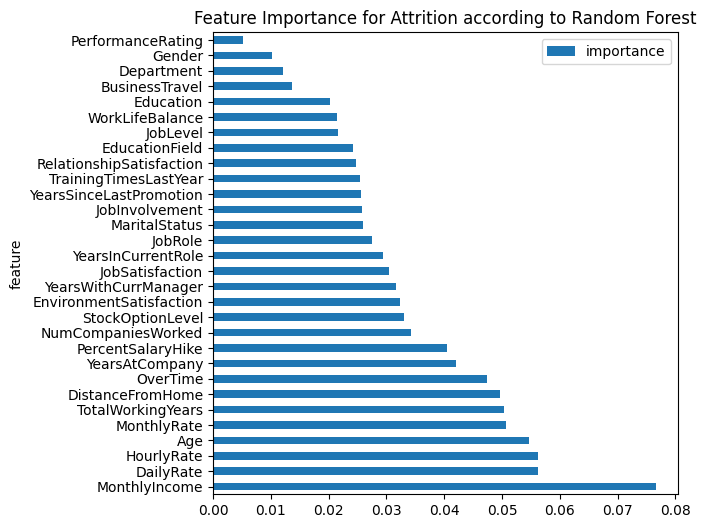

In [53]:
df = feature_imp(X, rf_clf)[:30]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance for Attrition according to Random Forest')

# Support Vector Machine

In [54]:
from sklearn.svm import SVC
svc_clf = SVC()
evaluate('Support Vector Machine',svc_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 91.49659863945578 %
CONFUSION MATRIX -
 [[985   1]
 [ 99  91]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       986
           1       0.99      0.48      0.65       190

    accuracy                           0.91      1176
   macro avg       0.95      0.74      0.80      1176
weighted avg       0.92      0.91      0.90      1176



TESTING ACCURACY - 87.75510204081633 %
CONFUSION MATRIX -
 [[246   1]
 [ 35  12]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       247
           1       0.92      0.26      0.40        47

    accuracy                           0.88       294
   macro avg       0.90      0.63      0.67       294
weighted avg       0.88      0.88      0.85       294




In [55]:
svc_param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

svc_clf = SVC(random_state=42)
svc_search = GridSearchCV(svc_clf, param_grid=svc_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
svc_search.fit(X_train_std, y_train)

svc_clf = SVC(**svc_search.best_params_, random_state=42)
svc_clf.fit(X_train_std, y_train)
optimize('Support Vector Machine',svc_clf, X_train_std, X_test_std, y_train, y_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
TRAINING ACCURACY - 83.92857142857143 %
CONFUSION MATRIX -
 [[986   0]
 [189   1]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       1.00      0.01      0.01       190

    accuracy                           0.84      1176
   macro avg       0.92      0.50      0.46      1176
weighted avg       0.87      0.84      0.77      1176



TESTING ACCURACY - 84.01360544217688 %
CONFUSION MATRIX -
 [[247   0]
 [ 47   0]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294




# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

grad_clf = GradientBoostingClassifier()
evaluate('Gradient Boosting',grad_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 95.66326530612244 %
CONFUSION MATRIX -
 [[985   1]
 [ 50 140]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       986
           1       0.99      0.74      0.85       190

    accuracy                           0.96      1176
   macro avg       0.97      0.87      0.91      1176
weighted avg       0.96      0.96      0.95      1176



TESTING ACCURACY - 86.05442176870748 %
CONFUSION MATRIX -
 [[236  11]
 [ 30  17]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.61      0.36      0.45        47

    accuracy                           0.86       294
   macro avg       0.75      0.66      0.69       294
weighted avg       0.84      0.86      0.85       294




In [57]:
grad_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['friedman_mse', 'squared_error']
}
grad_clf = GradientBoostingClassifier(random_state=42)
grad_search = GridSearchCV(grad_clf, param_grid=grad_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grad_search.fit(X_train_std, y_train)

grad_clf = GradientBoostingClassifier(**grad_search.best_params_, random_state=42)
grad_clf.fit(X_train_std, y_train)
optimize('Gradient Boosting',grad_clf, X_train_std, X_test_std, y_train, y_test)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
TRAINING ACCURACY - 97.10884353741497 %
CONFUSION MATRIX -
 [[986   0]
 [ 34 156]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       986
           1       1.00      0.82      0.90       190

    accuracy                           0.97      1176
   macro avg       0.98      0.91      0.94      1176
weighted avg       0.97      0.97      0.97      1176



TESTING ACCURACY - 87.75510204081633 %
CONFUSION MATRIX -
 [[240   7]
 [ 29  18]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.72      0.38      0.50        47

    accuracy                           0.88       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.88      0.86       294




# Adaptive Boosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
evaluate('Adaptive Boosting',ada_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 90.05102040816327 %
CONFUSION MATRIX -
 [[966  20]
 [ 97  93]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       986
           1       0.82      0.49      0.61       190

    accuracy                           0.90      1176
   macro avg       0.87      0.73      0.78      1176
weighted avg       0.89      0.90      0.89      1176



TESTING ACCURACY - 87.07482993197279 %
CONFUSION MATRIX -
 [[236  11]
 [ 27  20]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.65      0.43      0.51        47

    accuracy                           0.87       294
   macro avg       0.77      0.69      0.72       294
weighted avg       0.86      0.87      0.86       294




In [59]:
ada_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}


ada_clf = AdaBoostClassifier(random_state=42)
ada_search = GridSearchCV(ada_clf, param_grid=ada_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
ada_search.fit(X_train_std, y_train)

ada_clf = AdaBoostClassifier(**ada_search.best_params_, random_state=42)
ada_clf.fit(X_train_std, y_train)
optimize('Adaptive Boosting',ada_clf, X_train_std, X_test_std, y_train, y_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/aaditya/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/aaditya/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/aaditya/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/aaditya/miniconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

TRAINING ACCURACY - 90.3061224489796 %
CONFUSION MATRIX -
 [[972  14]
 [100  90]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       986
           1       0.87      0.47      0.61       190

    accuracy                           0.90      1176
   macro avg       0.89      0.73      0.78      1176
weighted avg       0.90      0.90      0.89      1176



TESTING ACCURACY - 87.75510204081633 %
CONFUSION MATRIX -
 [[238   9]
 [ 27  20]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.69      0.43      0.53        47

    accuracy                           0.88       294
   macro avg       0.79      0.69      0.73       294
weighted avg       0.86      0.88      0.87       294




# XGBoosting - (Extreme Gradient Boosting)

In [60]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
evaluate('XGBoosting',xgb_clf,X_train_std,X_test_std,y_train,y_test)

TRAINING ACCURACY - 100.0 %
CONFUSION MATRIX -
 [[986   0]
 [  0 190]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



TESTING ACCURACY - 86.73469387755102 %
CONFUSION MATRIX -
 [[238   9]
 [ 30  17]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.65      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.77      0.66      0.70       294
weighted avg       0.85      0.87      0.85       294




In [61]:
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'gamma': [0, 0.1, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.1, 1, 5]
}


xgb_clf = XGBClassifier(random_state=42)
xgb_search = GridSearchCV(xgb_clf, param_grid = xgb_param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
xgb_search.fit(X_train_std, y_train)

xgb_clf = XGBClassifier(**xgb_search.best_params_, random_state=42)
xgb_clf.fit(X_train_std, y_train)
optimize('XGBoosting',xgb_clf, X_train_std, X_test_std, y_train, y_test)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
TRAINING ACCURACY - 94.30272108843538 %
CONFUSION MATRIX -
 [[985   1]
 [ 66 124]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       986
           1       0.99      0.65      0.79       190

    accuracy                           0.94      1176
   macro avg       0.96      0.83      0.88      1176
weighted avg       0.95      0.94      0.94      1176



TESTING ACCURACY - 86.73469387755102 %
CONFUSION MATRIX -
 [[240   7]
 [ 32  15]]
CLASSIFICATION REPORT - 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.68      0.32      0.43        47

    accuracy                           0.87       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.85      0.87      0.85       294




Text(0.5, 1.0, 'Feature Importance for Attrition according to XGBoost')

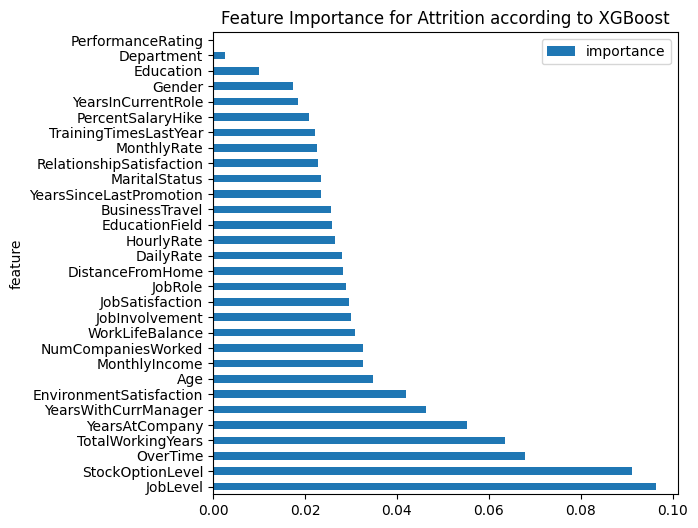

In [62]:
df = feature_imp(X, xgb_clf)[:30]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(6,6))
plt.title('Feature Importance for Attrition according to XGBoost')

# **Comparing The Model Performances**

In [63]:
print(initial_accuracies)

{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 100.0, 'test_accuracy': 76.19047619047619}, 'Random Forest': {'train_accuracy': 100.0, 'test_accuracy': 85.71428571428571}, 'Support Vector Machine': {'train_accuracy': 91.49659863945578, 'test_accuracy': 87.75510204081633}, 'Gradient Boosting': {'train_accuracy': 95.66326530612244, 'test_accuracy': 86.05442176870748}, 'Adaptive Boosting': {'train_accuracy': 90.05102040816327, 'test_accuracy': 87.07482993197279}, 'XGBoosting': {'train_accuracy': 100.0, 'test_accuracy': 86.73469387755102}}


In [69]:
i_accuracies = {'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 100.0, 'test_accuracy': 76.19047619047619}, 'Random Forest': {'train_accuracy': 100.0, 'test_accuracy': 85.71428571428571}, 'Support Vector Machine': {'train_accuracy': 91.49659863945578, 'test_accuracy': 87.75510204081633}, 'Gradient Boosting': {'train_accuracy': 95.66326530612244, 'test_accuracy': 86.05442176870748}, 'Adaptive Boosting': {'train_accuracy': 90.05102040816327, 'test_accuracy': 87.07482993197279}, 'XGBoosting': {'train_accuracy': 100.0, 'test_accuracy': 86.73469387755102}}
print("----INITIAL RESULTS USING LABEL ENCODER-----\n")
for model, acc in i_accuracies.items():
    print(f"{model:<25} Train Accuracy: {acc['train_accuracy']:.2f}, Test Accuracy: {acc['test_accuracy']:.2f}")


----INITIAL RESULTS USING LABEL ENCODER-----

Logistic Regression       Train Accuracy: 87.41, Test Accuracy: 86.39
Decision Tree             Train Accuracy: 100.00, Test Accuracy: 76.19
Random Forest             Train Accuracy: 100.00, Test Accuracy: 85.71
Support Vector Machine    Train Accuracy: 91.50, Test Accuracy: 87.76
Gradient Boosting         Train Accuracy: 95.66, Test Accuracy: 86.05
Adaptive Boosting         Train Accuracy: 90.05, Test Accuracy: 87.07
XGBoosting                Train Accuracy: 100.00, Test Accuracy: 86.73


In [65]:
print(optimized_accuracies)

{'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 85.03401360544217, 'test_accuracy': 85.71428571428571}, 'Random Forest': {'train_accuracy': 100.0, 'test_accuracy': 86.73469387755102}, 'Support Vector Machine': {'train_accuracy': 83.92857142857143, 'test_accuracy': 84.01360544217688}, 'Gradient Boosting': {'train_accuracy': 97.10884353741497, 'test_accuracy': 87.75510204081633}, 'Adaptive Boosting': {'train_accuracy': 90.3061224489796, 'test_accuracy': 87.75510204081633}, 'XGBoosting': {'train_accuracy': 94.30272108843538, 'test_accuracy': 86.73469387755102}}


In [70]:
o_accuracies = {'Logistic Regression': {'train_accuracy': 87.41496598639455, 'test_accuracy': 86.39455782312925}, 'Decision Tree': {'train_accuracy': 85.03401360544217, 'test_accuracy': 85.71428571428571}, 'Random Forest': {'train_accuracy': 100.0, 'test_accuracy': 86.73469387755102}, 'Support Vector Machine': {'train_accuracy': 83.92857142857143, 'test_accuracy': 84.01360544217688}, 'Gradient Boosting': {'train_accuracy': 97.10884353741497, 'test_accuracy': 87.75510204081633}, 'Adaptive Boosting': {'train_accuracy': 90.3061224489796, 'test_accuracy': 87.75510204081633}, 'XGBoosting': {'train_accuracy': 94.30272108843538, 'test_accuracy': 86.73469387755102}}
print("----OPTIMIZED RESULTS USING LABEL ENCODER-----\n")
for model, acc in o_accuracies.items():
    print(f"{model:<25} Train Accuracy: {acc['train_accuracy']:.2f}, Test Accuracy: {acc['test_accuracy']:.2f}")



----OPTIMIZED RESULTS USING LABEL ENCODER-----

Logistic Regression       Train Accuracy: 87.41, Test Accuracy: 86.39
Decision Tree             Train Accuracy: 85.03, Test Accuracy: 85.71
Random Forest             Train Accuracy: 100.00, Test Accuracy: 86.73
Support Vector Machine    Train Accuracy: 83.93, Test Accuracy: 84.01
Gradient Boosting         Train Accuracy: 97.11, Test Accuracy: 87.76
Adaptive Boosting         Train Accuracy: 90.31, Test Accuracy: 87.76
XGBoosting                Train Accuracy: 94.30, Test Accuracy: 86.73


In [67]:
initial_data = []
for model, acc in initial_accuracies.items():
    initial_data.append({'Model': model, 'Type': 'Train', 'Accuracy': acc['train_accuracy'], 'Accuracy Type': 'Initial'})
    initial_data.append({'Model': model, 'Type': 'Test', 'Accuracy': acc['test_accuracy'], 'Accuracy Type': 'Initial'})
initial_df = pd.DataFrame(initial_data)


optimized_data = []
for model, acc in optimized_accuracies.items():
    optimized_data.append({'Model': model, 'Type': 'Train', 'Accuracy': acc['train_accuracy'], 'Accuracy Type': 'Optimized'})
    optimized_data.append({'Model': model, 'Type': 'Test', 'Accuracy': acc['test_accuracy'], 'Accuracy Type': 'Optimized'})
optimized_df = pd.DataFrame(optimized_data)

combined_df = pd.concat([initial_df, optimized_df])


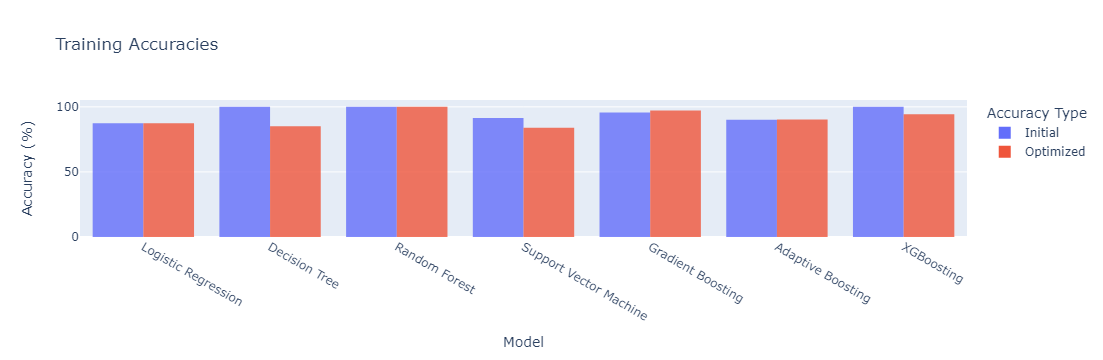

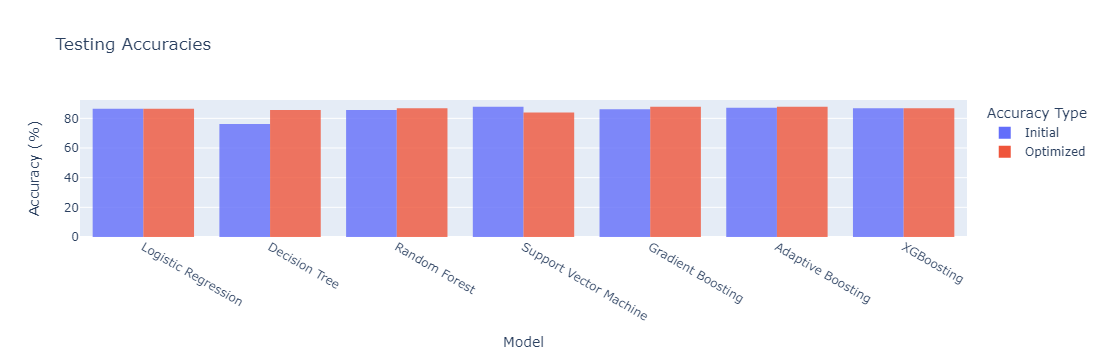

In [68]:
train_df = combined_df[combined_df['Type'] == 'Train']
test_df = combined_df[combined_df['Type'] == 'Test']

fig = px.bar(train_df, x='Model', y='Accuracy', color='Accuracy Type', barmode='group', opacity=0.8,
             title='Training Accuracies',
             labels={'Accuracy': 'Accuracy (%)'},
            )
fig.update_traces(marker_line_width=0, selector=dict(type='bar'))
fig.update_layout(height=500)
fig.show()

fig = px.bar(test_df, x='Model', y='Accuracy', color='Accuracy Type', barmode='group', opacity=0.8,
             title='Testing Accuracies',
             labels={'Accuracy': 'Accuracy (%)'},
            )
fig.update_traces(marker_line_width=0, selector=dict(type='bar'))
fig.update_layout(height=500)
fig.show()
